In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
data = pd.read_csv("train.csv");

In [4]:
data.head()

,Image_id,Animal
0,Img-1.jpg,hippopotamus
1,Img-2.jpg,squirrel
2,Img-3.jpg,grizzly+bear
3,Img-4.jpg,ox
4,Img-5.jpg,german+shepherd


In [5]:
data.pivot_table(index='Animal', aggfunc=len).sort_values('Image_id',ascending=False) #group it up

,Image_id
Animal,
horse,1111
buffalo,983
squirrel,808
antelope,695
german+shepherd,687
collie,680
seal,665
grizzly+bear,583
otter,519


In [6]:
data.head()

,Image_id,Animal
0,Img-1.jpg,hippopotamus
1,Img-2.jpg,squirrel
2,Img-3.jpg,grizzly+bear
3,Img-4.jpg,ox
4,Img-5.jpg,german+shepherd


In [7]:
categories = data['Animal'].unique()

In [8]:
categories

array(['hippopotamus', 'squirrel', 'grizzly+bear', 'ox',
       'german+shepherd', 'buffalo', 'otter', 'bobcat', 'wolf',
       'persian+cat', 'collie', 'antelope', 'seal', 'dalmatian',
       'siamese+cat', 'moose', 'horse', 'killer+whale', 'mouse', 'walrus',
       'beaver', 'rhinoceros', 'chimpanzee', 'weasel', 'spider+monkey',
       'raccoon', 'rat', 'chihuahua', 'mole', 'bat', 'elephant', 'rhino',
       'zebra'], dtype=object)

In [9]:
np.shape(categories)

(33,)

In [10]:
final_cat = list(categories)

In [11]:
final_cat

['hippopotamus',
 'squirrel',
 'grizzly+bear',
 'ox',
 'german+shepherd',
 'buffalo',
 'otter',
 'bobcat',
 'wolf',
 'persian+cat',
 'collie',
 'antelope',
 'seal',
 'dalmatian',
 'siamese+cat',
 'moose',
 'horse',
 'killer+whale',
 'mouse',
 'walrus',
 'beaver',
 'rhinoceros',
 'chimpanzee',
 'weasel',
 'spider+monkey',
 'raccoon',
 'rat',
 'chihuahua',
 'mole',
 'bat',
 'elephant',
 'rhino',
 'zebra']

In [12]:
data_arr = data.to_numpy()

In [13]:
data_arr

array([['Img-1.jpg', 'hippopotamus'],
       ['Img-2.jpg', 'squirrel'],
       ['Img-3.jpg', 'grizzly+bear'],
       ...,
       ['1507.jpg', 'zebra'],
       ['1508.jpg', 'zebra'],
       ['1509.jpg', 'zebra']], dtype=object)

In [14]:
# for category in final_cat:
#     label[final_cat.index(category)] = final_cat.index(category)

In [15]:
final_data = []
label_data=[]
data_dir = "./train"
IMG_SIZE = 100

In [16]:
data_arr_final = list(data_arr)

In [17]:
data_arr_final

[array(['Img-1.jpg', 'hippopotamus'], dtype=object),
 array(['Img-2.jpg', 'squirrel'], dtype=object),
 array(['Img-3.jpg', 'grizzly+bear'], dtype=object),
 array(['Img-4.jpg', 'ox'], dtype=object),
 array(['Img-5.jpg', 'german+shepherd'], dtype=object),
 array(['Img-6.jpg', 'buffalo'], dtype=object),
 array(['Img-7.jpg', 'otter'], dtype=object),
 array(['Img-8.jpg', 'bobcat'], dtype=object),
 array(['Img-9.jpg', 'wolf'], dtype=object),
 array(['Img-10.jpg', 'persian+cat'], dtype=object),
 array(['Img-11.jpg', 'collie'], dtype=object),
 array(['Img-12.jpg', 'antelope'], dtype=object),
 array(['Img-13.jpg', 'ox'], dtype=object),
 array(['Img-14.jpg', 'seal'], dtype=object),
 array(['Img-15.jpg', 'dalmatian'], dtype=object),
 array(['Img-16.jpg', 'siamese+cat'], dtype=object),
 array(['Img-17.jpg', 'moose'], dtype=object),
 array(['Img-18.jpg', 'buffalo'], dtype=object),
 array(['Img-19.jpg', 'wolf'], dtype=object),
 array(['Img-20.jpg', 'horse'], dtype=object),
 array(['Img-21.jpg', 'ott

In [18]:
for data in data_arr:
    label= final_cat.index(data[1])
#     print(label)
    try:
        img_array = cv2.imread(os.path.join(data_dir,data[0]))
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        final_data.append([label,new_array])
    except Exception as E:
        pass
   

In [19]:
np.random.shuffle(final_data)

In [20]:
# print(shuffle_data)

In [21]:
X = []
Y = []

for label, feature in final_data:
    X.append(feature)
    Y.append(label)

In [22]:
print(np.shape(X))

(14504, 100, 100, 3)


In [23]:
np.shape(Y)

(14504,)

In [24]:
Y

[16,
 10,
 32,
 12,
 27,
 29,
 22,
 4,
 24,
 2,
 27,
 12,
 5,
 2,
 8,
 10,
 1,
 10,
 5,
 10,
 9,
 11,
 5,
 5,
 9,
 1,
 15,
 28,
 5,
 22,
 8,
 5,
 1,
 13,
 15,
 5,
 29,
 15,
 1,
 9,
 12,
 5,
 1,
 32,
 19,
 11,
 27,
 19,
 20,
 8,
 32,
 22,
 30,
 2,
 11,
 27,
 27,
 10,
 24,
 16,
 10,
 31,
 12,
 5,
 0,
 15,
 19,
 31,
 1,
 29,
 2,
 16,
 30,
 14,
 3,
 23,
 18,
 11,
 7,
 21,
 4,
 9,
 6,
 9,
 27,
 19,
 7,
 20,
 1,
 31,
 17,
 11,
 15,
 25,
 15,
 0,
 12,
 21,
 15,
 5,
 14,
 13,
 8,
 5,
 15,
 18,
 27,
 17,
 32,
 1,
 4,
 1,
 1,
 0,
 32,
 23,
 5,
 16,
 12,
 3,
 27,
 4,
 12,
 10,
 4,
 26,
 4,
 9,
 6,
 17,
 31,
 12,
 28,
 7,
 2,
 9,
 14,
 16,
 12,
 30,
 4,
 3,
 15,
 2,
 7,
 7,
 22,
 5,
 32,
 25,
 6,
 32,
 32,
 11,
 22,
 32,
 5,
 5,
 1,
 12,
 11,
 7,
 16,
 16,
 16,
 30,
 23,
 3,
 1,
 22,
 22,
 0,
 7,
 12,
 9,
 10,
 6,
 2,
 12,
 11,
 7,
 5,
 5,
 7,
 11,
 7,
 5,
 6,
 0,
 2,
 5,
 21,
 5,
 25,
 10,
 4,
 15,
 31,
 13,
 4,
 8,
 27,
 13,
 3,
 4,
 25,
 31,
 1,
 1,
 0,
 6,
 17,
 14,
 13,
 29,
 17,
 7,
 6,
 0,


In [25]:
X = np.array(X)
Y = np.array(Y)

In [26]:
X = X/255

In [27]:
X

array([[[[0.96078431, 0.95294118, 0.95294118],
         [0.96078431, 0.95294118, 0.95294118],
         [0.96470588, 0.95686275, 0.95686275],
         ...,
         [0.96862745, 0.96862745, 0.96862745],
         [0.96862745, 0.96078431, 0.96078431],
         [0.96862745, 0.96078431, 0.96078431]],

        [[0.97254902, 0.96470588, 0.96470588],
         [0.96078431, 0.96078431, 0.96078431],
         [0.97254902, 0.96470588, 0.96470588],
         ...,
         [0.97647059, 0.96862745, 0.96862745],
         [0.96862745, 0.96078431, 0.96078431],
         [0.96078431, 0.96078431, 0.96078431]],

        [[0.97647059, 0.96862745, 0.96862745],
         [0.97254902, 0.97254902, 0.97254902],
         [0.96862745, 0.96862745, 0.96862745],
         ...,
         [0.97647059, 0.96862745, 0.96862745],
         [0.97647059, 0.96862745, 0.96862745],
         [0.97254902, 0.96078431, 0.96078431]],

        ...,

        [[0.19607843, 0.60392157, 0.45882353],
         [0.2627451 , 0.61176471, 0.47843137]

In [28]:
np.max(X)

1.0

In [29]:
Y

array([16, 10, 32, ...,  6,  1,  5])

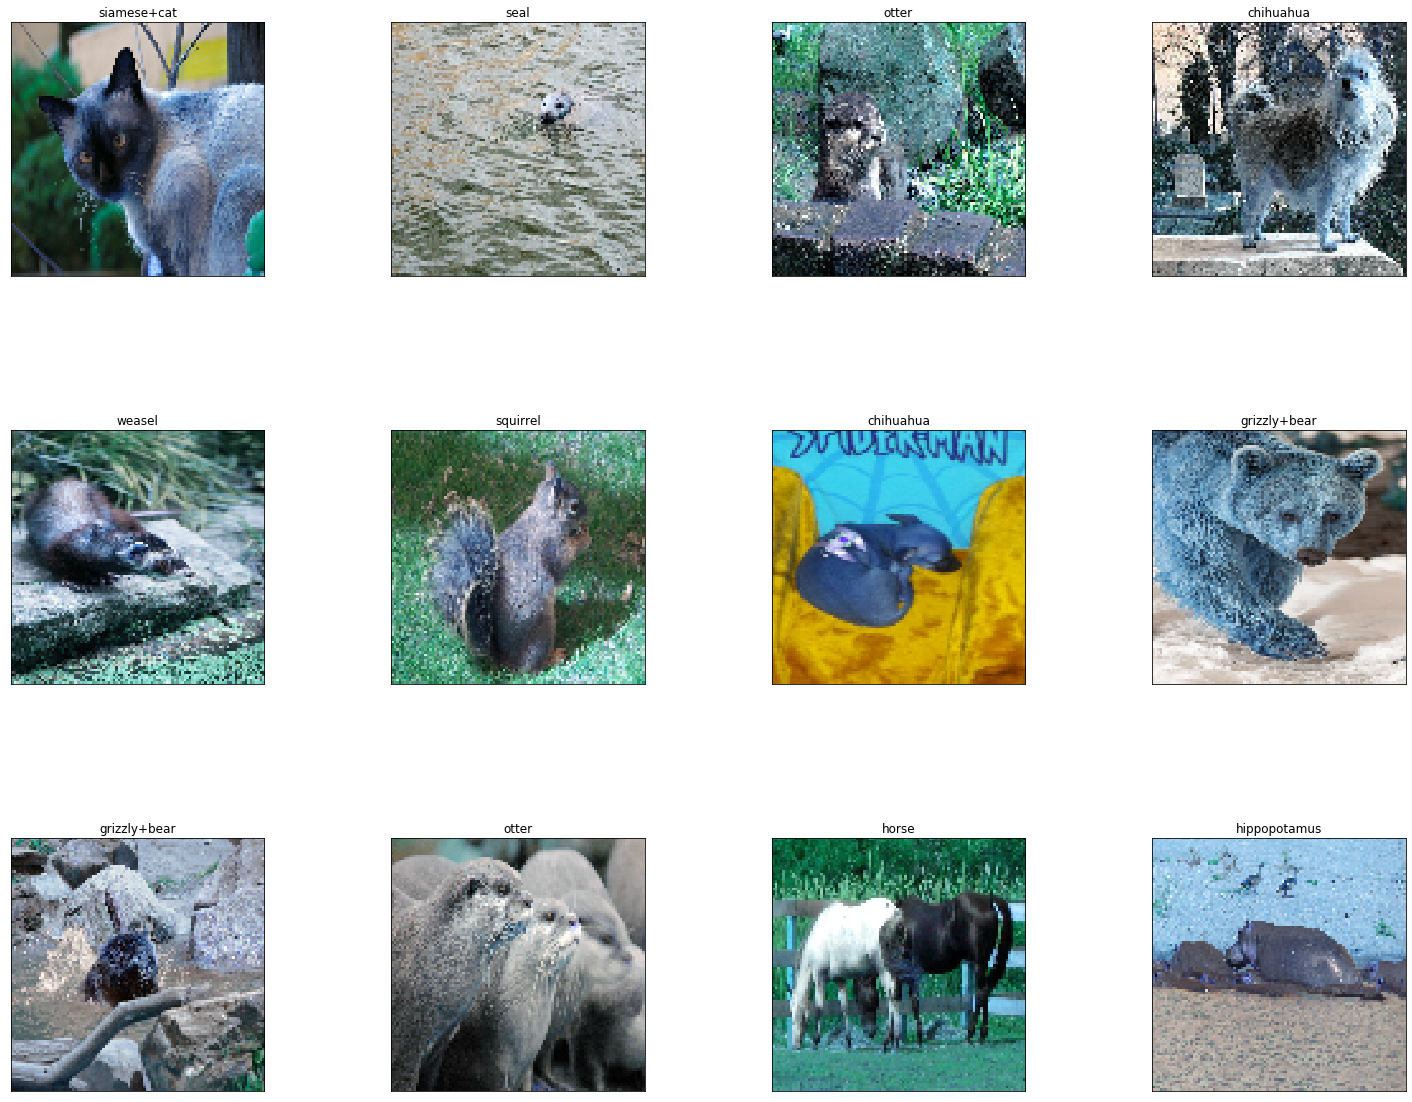

In [30]:
val = np.random.randint(0,len(X), 12)
r = 1
plt.figure(figsize=(25,20))
for value in val:
    plt.subplot(3,4,r)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    plt.xticks([]), plt.yticks([])
    plt.title(categories[Y[value]])
    r += 1
    plt.imshow(X[value])
plt.show()

In [31]:
Y = to_categorical(Y)

In [32]:
print(Y[2])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [33]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.15, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

In [35]:
model = Sequential()
model.add(Conv2D(64,3, padding='same', input_shape=(100,100,3)))
model.add(MaxPool2D((4,4)))
model.add(Conv2D(32,3, padding='same', input_shape=(100,100,3)))
model.add(MaxPool2D((4,4)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(246))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(16))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Dense(33, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1152)              4608      
_________________________________________________________________
dense_1 (Dense)              (None, 246)              

In [36]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    rotation_range = 10,
    zoom_range=0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

datagen.fit(x_train)

In [37]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),epochs=1000, validation_data=(x_val, y_val))

Epoch 1/1000
347/347 [==============================] - 92s 264ms/step - loss: 4.0762 - accuracy: 0.0453 - val_loss: 3.4057 - val_accuracy: 0.0657
Epoch 2/1000
347/347 [==============================] - 86s 247ms/step - loss: 3.4016 - accuracy: 0.0772 - val_loss: 3.3441 - val_accuracy: 0.0673
Epoch 3/1000
347/347 [==============================] - 86s 247ms/step - loss: 3.2859 - accuracy: 0.1013 - val_loss: 3.1514 - val_accuracy: 0.1144
Epoch 4/1000
347/347 [==============================] - 82s 235ms/step - loss: 3.1947 - accuracy: 0.1225 - val_loss: 3.7963 - val_accuracy: 0.0916
Epoch 5/1000
347/347 [==============================] - 86s 247ms/step - loss: 3.1190 - accuracy: 0.1365 - val_loss: 2.9912 - val_accuracy: 0.1541
Epoch 6/1000
347/347 [==============================] - 89s 255ms/step - loss: 3.0777 - accuracy: 0.1434 - val_loss: 3.0103 - val_accuracy: 0.1573
Epoch 7/1000
347/347 [==============================] - 87s 250ms/step - loss: 3.0153 - accuracy: 0.1634 - val_loss: 3

347/347 [==============================] - 88s 253ms/step - loss: 2.6553 - accuracy: 0.2377 - val_loss: 3.2552 - val_accuracy: 0.1703
Epoch 112/1000
347/347 [==============================] - 86s 248ms/step - loss: 2.6423 - accuracy: 0.2356 - val_loss: 2.6519 - val_accuracy: 0.2165
Epoch 113/1000
347/347 [==============================] - 92s 264ms/step - loss: 2.6479 - accuracy: 0.2381 - val_loss: 2.8490 - val_accuracy: 0.1979
Epoch 114/1000
347/347 [==============================] - 89s 257ms/step - loss: 2.6367 - accuracy: 0.2431 - val_loss: 2.7387 - val_accuracy: 0.2149
Epoch 115/1000
347/347 [==============================] - 91s 262ms/step - loss: 2.6383 - accuracy: 0.2390 - val_loss: 2.7270 - val_accuracy: 0.2206
Epoch 116/1000
347/347 [==============================] - 87s 252ms/step - loss: 2.6402 - accuracy: 0.2372 - val_loss: 3.0068 - val_accuracy: 0.1914
Epoch 117/1000
347/347 [==============================] - 92s 266ms/step - loss: 2.6502 - accuracy: 0.2427 - val_loss: 2.

Epoch 166/1000
347/347 [==============================] - 97s 280ms/step - loss: 2.6220 - accuracy: 0.2401 - val_loss: 2.7748 - val_accuracy: 0.2214
Epoch 167/1000
347/347 [==============================] - 93s 268ms/step - loss: 2.5956 - accuracy: 0.2489 - val_loss: 2.7823 - val_accuracy: 0.2190
Epoch 168/1000
347/347 [==============================] - 92s 266ms/step - loss: 2.6158 - accuracy: 0.2457 - val_loss: 2.6294 - val_accuracy: 0.2449
Epoch 169/1000
347/347 [==============================] - 95s 273ms/step - loss: 2.6045 - accuracy: 0.2484 - val_loss: 2.6610 - val_accuracy: 0.2417
Epoch 170/1000
347/347 [==============================] - 87s 250ms/step - loss: 2.5909 - accuracy: 0.2494 - val_loss: 2.6665 - val_accuracy: 0.2287
Epoch 171/1000
347/347 [==============================] - 94s 271ms/step - loss: 2.6119 - accuracy: 0.2440 - val_loss: 2.9273 - val_accuracy: 0.2109
Epoch 172/1000
347/347 [==============================] - 89s 255ms/step - loss: 2.6155 - accuracy: 0.2440

Epoch 221/1000
347/347 [==============================] - 88s 253ms/step - loss: 2.5852 - accuracy: 0.2530 - val_loss: 2.7961 - val_accuracy: 0.2376
Epoch 222/1000
347/347 [==============================] - 91s 261ms/step - loss: 2.5957 - accuracy: 0.2535 - val_loss: 2.6684 - val_accuracy: 0.2433
Epoch 223/1000
347/347 [==============================] - 90s 260ms/step - loss: 2.5982 - accuracy: 0.2452 - val_loss: 2.7380 - val_accuracy: 0.2052
Epoch 224/1000
347/347 [==============================] - 88s 254ms/step - loss: 2.5755 - accuracy: 0.2613 - val_loss: 3.2450 - val_accuracy: 0.1946
Epoch 225/1000
347/347 [==============================] - 86s 248ms/step - loss: 2.5919 - accuracy: 0.2491 - val_loss: 2.5625 - val_accuracy: 0.2490
Epoch 226/1000
347/347 [==============================] - 91s 263ms/step - loss: 2.5972 - accuracy: 0.2483 - val_loss: 2.6558 - val_accuracy: 0.2320
Epoch 227/1000
347/347 [==============================] - 84s 243ms/step - loss: 2.5773 - accuracy: 0.2521

Epoch 276/1000
347/347 [==============================] - 93s 269ms/step - loss: 2.5789 - accuracy: 0.2475 - val_loss: 3.0881 - val_accuracy: 0.1784
Epoch 277/1000
347/347 [==============================] - 94s 271ms/step - loss: 2.5732 - accuracy: 0.2509 - val_loss: 2.5307 - val_accuracy: 0.2320
Epoch 278/1000
347/347 [==============================] - 95s 274ms/step - loss: 2.5572 - accuracy: 0.2501 - val_loss: 3.0790 - val_accuracy: 0.2036
Epoch 279/1000
347/347 [==============================] - 85s 245ms/step - loss: 2.5668 - accuracy: 0.2550 - val_loss: 2.6310 - val_accuracy: 0.2474
Epoch 280/1000
347/347 [==============================] - 92s 266ms/step - loss: 2.5642 - accuracy: 0.2562 - val_loss: 2.6308 - val_accuracy: 0.2571
Epoch 281/1000
347/347 [==============================] - 92s 265ms/step - loss: 2.5701 - accuracy: 0.2485 - val_loss: 2.7702 - val_accuracy: 0.2279
Epoch 282/1000
347/347 [==============================] - 104s 298ms/step - loss: 2.5650 - accuracy: 0.254

Epoch 331/1000
347/347 [==============================] - 87s 249ms/step - loss: 2.5490 - accuracy: 0.2543 - val_loss: 2.9548 - val_accuracy: 0.2109
Epoch 332/1000
347/347 [==============================] - 86s 247ms/step - loss: 2.5547 - accuracy: 0.2551 - val_loss: 2.7708 - val_accuracy: 0.2352
Epoch 333/1000
347/347 [==============================] - 88s 255ms/step - loss: 2.5458 - accuracy: 0.2553 - val_loss: 3.3932 - val_accuracy: 0.1817
Epoch 334/1000
347/347 [==============================] - 90s 261ms/step - loss: 2.5573 - accuracy: 0.2542 - val_loss: 3.4857 - val_accuracy: 0.1711
Epoch 335/1000
347/347 [==============================] - 87s 252ms/step - loss: 2.5605 - accuracy: 0.2555 - val_loss: 3.0907 - val_accuracy: 0.2068
Epoch 336/1000
347/347 [==============================] - 87s 252ms/step - loss: 2.5558 - accuracy: 0.2562 - val_loss: 2.6745 - val_accuracy: 0.2409
Epoch 337/1000
347/347 [==============================] - 85s 244ms/step - loss: 2.5533 - accuracy: 0.2524

KeyboardInterrupt: 

In [38]:
y_pred = model.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred.round()))

0.07215073529411764
